✅ GEMINI_API_KEY başarıyla yüklendi ve ortama aktarıldı.
✅ Portföy tanımları yüklendi: ['Global Macro Fund - Q4 2025', 'EM Credit Fund - 2025']
✅ CrewAI LLM nesneleri (Gemini) hazır.
✅ FinancialDataTool hazır.
✅ Agent builder fonksiyonu hazır.
🔎 Çalıştırılan portföy: Global Macro Fund - Q4 2025
🔧 Base Stress Scenario: {'equity_shock': -25, 'fx_shock': 40, 'spread_shock_bp': 200, 'rate_shock_bp': 150}

===== USER-DEFINED BASE SCENARIO =====



User-defined Base Stress Scenario:
- Equity Shock: -25%
- FX Shock (local currency depreciation vs USD): 40%
- Credit Spread Shock: +200 bps
- Interest Rate Shock: +150 bps


===== CRO EXECUTIVE RISK REPORT =====

**Global Macro Fund - Q4 2025: Executive Market Risk Report**

**1. Executive Summary**

*   The Global Macro Fund faces significant market risks, primarily from equity market exposure, emerging market assets, and leveraged FX positions.
*   Recent VaR breaches indicate potential model underestimation of risk or increased market volatility, requiring immediate investigation.
*   Stress testing reveals substantial potential losses under adverse scenarios, particularly stagflation and geopolitical crisis, exceeding established risk limits.
*   Recommended actions include reducing leverage, diversifying asset allocation, and enhancing risk model accuracy.
*   Immediate action is required to mitigate potential losses and ensure compliance with risk mandates.

**2. Key Market Risk

╭─────────────────────────────────────────────── Execution Traces ────────────────────────────────────────────────╮
│                                                                                                                 │
│  🔍 Detailed execution traces are available!                                                                    │
│                                                                                                                 │
│  View insights including:                                                                                       │
│    • Agent decision-making process                                                                              │
│    • Task execution flow and timing                                                                             │
│    • Tool usage details                                                                                         │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Would you like to view your execution traces? [y/N] (20s timeout): 

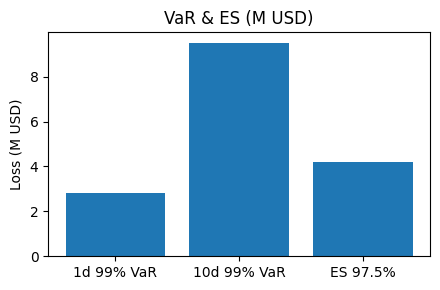

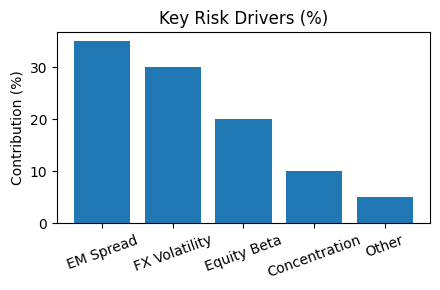


✅ Word raporu oluşturuldu: Global_Macro_Fund_-_Q4_2025_CRO_Report.docx
✅ PDF raporu oluşturuldu:  Global_Macro_Fund_-_Q4_2025_CRO_Report.pdf
Colab'de sol taraftaki dosyalar bölümünden indirip yöneticiye gönderebilirsin.
mericozcan.edu@gmail.com


In [ ]:
# ==========================================================
# 0) GEMINI_API_KEY: COLAB SECRETS → ENV BRIDGE
# ==========================================================
import os
from google.colab import userdata

GEMINI_API_KEY = userdata.get("GEMINI_API_KEY")

if not GEMINI_API_KEY:
    raise ValueError(
        "❌ GEMINI_API_KEY Colab Secrets içinde bulunamadı.\n"
        "Sağdaki 'Secrets' panelinden GEMINI_API_KEY eklediğinden emin ol."
    )

os.environ["GEMINI_API_KEY"] = GEMINI_API_KEY
print("✅ GEMINI_API_KEY başarıyla yüklendi ve ortama aktarıldı.")


# ==========================================================
# 1) PORTFÖY TANIMLARI (MULTI-PORTFOLIO)
# ==========================================================
PORTFOLIOS = {
    "Global Macro Fund - Q4 2025": {
        "description": "Global risk-off’a duyarlı, EM ve FX ağırlıklı global macro portföy.",
        "data": """
Portföy: Global Macro Fund - Q4 2025 Risk Özeti
Toplam Değer: 120M USD

Dağılım:
- Equity (DM): %45
- EM Bonds: %25
- FX: %15
- Commodity: %10
- Cash: %5

Risk:
- Portföy Beta: 1.25
- 1g %99 VaR: 2.8M USD
- 10g %99 VaR: 9.5M USD
- ES (97.5%): 4.2M USD
- Son 30 günde 3 VaR breach
- FX kaldıraç: 3x
""",
        "var_metrics": {
            "1d 99% VaR": 2.8,
            "10d 99% VaR": 9.5,
            "ES 97.5%": 4.2,
        },
        "risk_drivers": {
            "EM Spread": 35,
            "FX Volatility": 30,
            "Equity Beta": 20,
            "Concentration": 10,
            "Other": 5,
        },
    },
    "EM Credit Fund - 2025": {
        "description": "EM sovereign ve corporate tahvillere odaklı kredi fonu.",
        "data": """
Portföy: EM Credit Fund - 2025 Risk Özeti
Toplam Değer: 80M USD

Dağılım:
- EM Sovereign Bonds: %50
- EM Corporate Bonds: %30
- FX Hedged: %10
- Cash: %10

Risk:
- Portföy Spread DV01: 420k USD/bp
- Ortalama Rating: BB+
- 1g %99 Credit VaR: 1.9M USD
- 10g %99 Credit VaR: 6.1M USD
- ES (97.5%): 3.0M USD
- Son 30 günde 2 limit breach
""",
        "var_metrics": {
            "1d 99% VaR": 1.9,
            "10d 99% VaR": 6.1,
            "ES 97.5%": 3.0,
        },
        "risk_drivers": {
            "Credit Spread": 45,
            "Rates": 20,
            "FX": 15,
            "Liquidity": 15,
            "Other": 5,
        },
    },
}

print("✅ Portföy tanımları yüklendi:", list(PORTFOLIOS.keys()))


# ==========================================================
# 2) CREWAI LLM NESNELERİ (GEMINI ÜZERİNDEN LITELLM)
# ==========================================================
from crewai import LLM

market_llm = LLM(
    model="gemini/gemini-2.0-flash",
    temperature=0.25,
)

cro_llm = LLM(
    model="gemini/gemini-2.0-flash",
    temperature=0.15,
)

print("✅ CrewAI LLM nesneleri (Gemini) hazır.")


# ==========================================================
# 3) TOOL: PORTFÖY RİSK VERİSİ
# ==========================================================
from crewai.tools import BaseTool

class FinancialDataTool(BaseTool):
    name: str = "Financial Risk Data Fetcher"
    description: str = "Seçilen portföy için risk verisini döner."

    def _run(self, argument: str) -> str:
        portfolio = PORTFOLIOS.get(argument)
        if not portfolio:
            return f"Portföy bulunamadı: {argument}"
        return portfolio["data"]

financial_data_tool = FinancialDataTool()
print("✅ FinancialDataTool hazır.")


# ==========================================================
# 4) AJANLAR
# ==========================================================
from crewai import Agent

def build_agents():
    market_risk_analyst = Agent(
        role="Market Risk Analyst",
        goal="Portföyün piyasa riskini analiz etmek.",
        backstory="Global fonlarda çalışmış kıdemli piyasa risk analistisin.",
        tools=[financial_data_tool],
        llm=market_llm,
        verbose=False,
    )

    stress_test_specialist = Agent(
        role="Stress Testing Specialist",
        goal="Makro stres senaryoları tasarlayıp portföy üzerindeki etkisini analiz etmek.",
        backstory="Küresel kriz senaryoları tasarlayan uzman stres test analistisin.",
        llm=market_llm,
        verbose=False,
    )

    risk_report_writer = Agent(
        role="CRO Risk Report Writer",
        goal="CRO için 1 sayfalık, aksiyon odaklı executive risk raporu yazmak.",
        backstory="Yönetim kuruluna rapor yazmaya alışkın, net ve öz bir CRO rapor yazarısın.",
        llm=cro_llm,
        verbose=False,
    )

    return market_risk_analyst, stress_test_specialist, risk_report_writer

print("✅ Agent builder fonksiyonu hazır.")


# ==========================================================
# 5) PIPELINE FONKSİYONU (MULTİ-PORTFÖY + SCENARIO OVERRIDE)
# ==========================================================
from crewai import Task, Crew, Process

from textwrap import wrap
from datetime import datetime
from io import BytesIO
from docx import Document
from reportlab.lib.pagesizes import A4
from reportlab.pdfgen import canvas
import matplotlib.pyplot as plt

def run_portfolio_pipeline(portfolio_name: str,
                           scenario_params: dict,
                           custom_text: str = None):
    """
    scenario_params:
      {
        "equity_shock": -25,
        "fx_shock": 40,
        "spread_shock_bp": 200,
        "rate_shock_bp": 150
      }
    custom_text: portföy datasını override etmek istersen
    """
    base = PORTFOLIOS[portfolio_name]
    portfolio_text = custom_text if custom_text is not None else base["data"]

    market_risk_analyst, stress_test_specialist, risk_report_writer = build_agents()

    # Kullanıcı tanımlı base senaryo
    user_scenario_text = (
        f"User-defined Base Stress Scenario:\n"
        f"- Equity Shock: {scenario_params['equity_shock']}%\n"
        f"- FX Shock (local currency depreciation vs USD): {scenario_params['fx_shock']}%\n"
        f"- Credit Spread Shock: +{scenario_params['spread_shock_bp']} bps\n"
        f"- Interest Rate Shock: +{scenario_params['rate_shock_bp']} bps\n"
    )

    # 1) Market risk analizi görevi
    market_task = Task(
        description=(
            "You are analyzing the following portfolio:\n\n"
            f"Name: {portfolio_name}\n"
            f"Raw Data:\n{portfolio_text}\n\n"
            "Task:\n"
            "- Summarize main market risk factors (equity, rates, credit, FX, commodities).\n"
            "- Comment on VaR/ES metrics if present.\n"
            "- Identify 3–5 key risk drivers and concentrations.\n"
        ),
        expected_output=(
            "A concise market risk analysis summarizing key risk factors, VaR/ES interpretation "
            "and 3–5 main risk drivers."
        ),
        agent=market_risk_analyst,
    )

    # 2) Stres testi görevi (user-defined base scenario dahil)
    stress_task = Task(
        description=(
            f"You are designing stress scenarios for the portfolio '{portfolio_name}'.\n\n"
            f"{user_scenario_text}\n"
            "Use the user-defined base stress scenario above as Scenario 1.\n\n"
            "Then design at least 2 additional macro stress scenarios (Scenario 2 and 3):\n"
            "- Each scenario should specify shocks to equity, FX, credit spreads and rates.\n"
            "- For each scenario, provide an approximate P&L impact range in million USD.\n"
            "- Indicate if any risk limits or risk appetite metrics are likely to be breached.\n"
        ),
        expected_output=(
            "At least 3 clearly defined stress scenarios (including the user-defined one), "
            "with shock descriptions, P&L impact ranges and commentary on potential limit breaches."
        ),
        agent=stress_test_specialist,
    )

    # 3) CRO rapor görevi
    cro_task = Task(
        description=(
            f"Using the previous tasks (market risk analysis and stress scenarios) for the portfolio "
            f"'{portfolio_name}', write a one-page CRO executive market risk report (max 400–500 words).\n\n"
            "Structure:\n"
            "1) Executive Summary (3–5 bullets)\n"
            "2) Key Market Risks\n"
            "3) Stress Scenarios & Expected Impact (explicitly mention Scenario 1 as the user-defined base scenario)\n"
            "4) Recommended Risk Mitigation Actions\n"
        ),
        expected_output=(
            "A one-page executive CRO market risk report (max ~500 words) with headings, bullets and "
            "actionable recommendations."
        ),
        agent=risk_report_writer,
    )

    crew = Crew(
        agents=[market_risk_analyst, stress_test_specialist, risk_report_writer],
        tasks=[market_task, stress_task, cro_task],
        process=Process.sequential,
        verbose=False,
    )

    result = crew.kickoff(
        inputs={
            "portfolio_name": portfolio_name,
            "portfolio_data": portfolio_text,
        }
    )

    cro_report = str(result)

    return {
        "cro_report": cro_report,
        "user_scenario_text": user_scenario_text,
        "var_metrics": base["var_metrics"],
        "risk_drivers": base["risk_drivers"],
    }


# ==========================================================
# 6) WORD & PDF RAPOR OLUŞTURMA FONKSİYONLARI
# ==========================================================
def build_word_report(portfolio_name: str, cro_report: str) -> str:
    filename = f"{portfolio_name.replace(' ', '_')}_CRO_Report.docx"
    doc = Document()
    doc.add_heading("CRO Market Risk Report", level=1)

    meta = doc.add_paragraph()
    meta.add_run("Portfolio: ").bold = True
    meta.add_run(portfolio_name)
    meta.add_run("\nDate: ").bold = True
    meta.add_run(datetime.today().strftime("%d %B %Y"))

    doc.add_paragraph("")
    for block in cro_report.split("\n"):
        block = block.strip()
        if not block:
            continue
        doc.add_paragraph(block)

    doc.save(filename)
    return filename

def build_pdf_report(portfolio_name: str, cro_report: str) -> str:
    filename = f"{portfolio_name.replace(' ', '_')}_CRO_Report.pdf"
    c = canvas.Canvas(filename, pagesize=A4)
    width, height = A4

    margin_x = 40
    margin_y = 40
    cursor_y = height - margin_y

    c.setFont("Helvetica-Bold", 16)
    c.drawString(margin_x, cursor_y, "CRO Market Risk Report")
    cursor_y -= 24

    c.setFont("Helvetica", 10)
    c.drawString(margin_x, cursor_y, f"Portfolio: {portfolio_name}")
    cursor_y -= 14
    c.drawString(margin_x, cursor_y, f"Date: {datetime.today().strftime('%d %B %Y')}")
    cursor_y -= 20

    c.setFont("Helvetica", 9)
    max_line_width_chars = 95
    line_height = 11

    for paragraph in cro_report.split("\n"):
        paragraph = paragraph.strip()
        if not paragraph:
            cursor_y -= line_height
            continue
        for line in wrap(paragraph, max_line_width_chars):
            if cursor_y < margin_y:
                c.showPage()
                cursor_y = height - margin_y
                c.setFont("Helvetica", 9)
            c.drawString(margin_x, cursor_y, line)
            cursor_y -= line_height

    c.showPage()
    c.save()
    return filename


# ==========================================================
# 7) ÖRNEK ÇALIŞTIRMA (SCENARIO OVERRIDE + GÖRSELLEŞTİRME)
# ==========================================================
portfolio_name = "Global Macro Fund - Q4 2025"

scenario_params = {
    "equity_shock": -25,      # % olarak
    "fx_shock": 40,           # % değer kaybı
    "spread_shock_bp": 200,   # baz puan
    "rate_shock_bp": 150,     # baz puan
}

print(f"🔎 Çalıştırılan portföy: {portfolio_name}")
print("🔧 Base Stress Scenario:", scenario_params)

outputs = run_portfolio_pipeline(portfolio_name, scenario_params)

cro_report = outputs["cro_report"]
user_scenario_text = outputs["user_scenario_text"]
var_metrics = outputs["var_metrics"]
risk_drivers = outputs["risk_drivers"]

print("\n===== USER-DEFINED BASE SCENARIO =====\n")
print(user_scenario_text)

print("\n===== CRO EXECUTIVE RISK REPORT =====\n")
print(cro_report)


# --- Şık görselleştirmeler (Colab içinde) ---
# VaR & ES bar chart
plt.figure(figsize=(4.5, 3))
plt.bar(list(var_metrics.keys()), list(var_metrics.values()))
plt.title("VaR & ES (M USD)")
plt.ylabel("Loss (M USD)")
plt.tight_layout()
plt.show()

# Risk drivers bar chart
plt.figure(figsize=(4.5, 3))
plt.bar(list(risk_drivers.keys()), list(risk_drivers.values()))
plt.title("Key Risk Drivers (%)")
plt.ylabel("Contribution (%)")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# Word & PDF raporları oluştur
docx_file = build_word_report(portfolio_name, cro_report)
pdf_file = build_pdf_report(portfolio_name, cro_report)

print(f"\n✅ Word raporu oluşturuldu: {docx_file}")
print(f"✅ PDF raporu oluşturuldu:  {pdf_file}")
print("Colab'de sol taraftaki dosyalar bölümünden indirip yöneticiye gönderebilirsin.")
